In [5]:
import numpy
import pandas
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
# from sklearn.cross_validation import train_test_split
# 这个亲测用不了了，神奇，导入下面的两个进行替换
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [6]:
# load dataset
dataframe = pandas.read_csv(r"./car_evaluation.csv")

# Assign names to Columns
dataframe.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']

# Encode Data
dataframe.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
dataframe.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
dataframe.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
dataframe.persons.replace(('2','4','more'),(1,2,3), inplace=True)
dataframe.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
dataframe.safety.replace(('low','med','high'),(1,2,3), inplace=True)
dataframe.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [7]:
print("yyy")
# https://www.kaggle.com/elikplim/knn-and-ann-mlp-for-car-evaluation?tdsourcetag=s_pctim_aiomsg

yyy


In [8]:
print("dataframe.head: ", dataframe.head())

dataframe.head:     buying  maint  doors  persons  lug_boot  safety  classes
0       1      1      1        1         1       1        1
1       1      1      1        1         1       2        1
2       1      1      1        1         1       3        1
3       1      1      1        1         2       1        1
4       1      1      1        1         2       2        1


In [9]:
print("dataframe.describe: ", dataframe.describe())

dataframe.describe:              buying        maint        doors      persons     lug_boot  \
count  1350.000000  1350.000000  1350.000000  1350.000000  1350.000000   
mean      2.080000     2.440000     2.460000     2.000000     2.000000   
std       0.891172     1.134616     1.117732     0.816799     0.816799   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       2.000000     2.000000     2.000000     2.000000     2.000000   
75%       3.000000     3.000000     3.000000     3.000000     3.000000   
max       4.000000     4.000000     4.000000     3.000000     3.000000   

            safety      classes  
count  1350.000000  1350.000000  
mean      2.000000     1.322222  
std       0.816799     0.606875  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       2.000000     1.000000  
75%       3.000000     2.000000  
max       3.000000     4.000000  


(array([990.,   0.,   0., 311.,   0.,   0.,  23.,   0.,   0.,  26.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

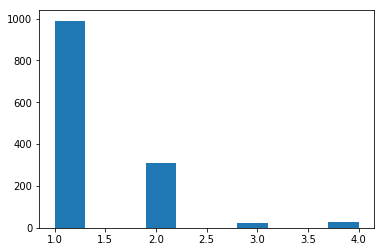

In [10]:
plt.hist((dataframe.classes))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1ED522D30>,
      dtype=object)

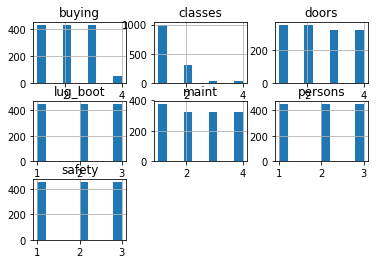

In [11]:
dataframe.hist()

In [12]:
dataset = dataframe.values


X = dataset[:,0:6]
Y = numpy.asarray(dataset[:,6], dtype="S6")


# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)


# create model
knn = KNeighborsClassifier()

knn.fit(X_Train, Y_Train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')

predictions = knn.predict(X_Test)

score = accuracy_score(Y_Test, predictions)
print(score)

0.9259259259259259


In [13]:
# create model
model = Sequential()
model.add(Dense(25, input_dim=6, init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='relu'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_Train, Y_Train, epochs=600, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

D:\software\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, input_dim=6, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\software\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_constraint=<keras.con..., kernel_initializer="uniform")`
  after removing the cwd from sys.path.
D:\software\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
D:\software\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  import sys


Instructions for updating:
Use tf.cast instead.
Epoch 1/600
1080/1080 [==============================] - 0s 410us/step - loss: 1.6599 - accuracy: 0.1259
Epoch 2/600
1080/1080 [==============================] - 0s 167us/step - loss: 0.3134 - accuracy: 0.7157
Epoch 3/600
1080/1080 [==============================] - 0s 176us/step - loss: 0.3015 - accuracy: 0.7204
Epoch 4/600
1080/1080 [==============================] - 0s 163us/step - loss: 0.2935 - accuracy: 0.7463
Epoch 5/600
1080/1080 [==============================] - 0s 169us/step - loss: 0.2722 - accuracy: 0.7500
Epoch 6/600
1080/1080 [==============================] - 0s 186us/step - loss: 0.2875 - accuracy: 0.7454
Epoch 7/600
1080/1080 [==============================] - 0s 153us/step - loss: 0.2752 - accuracy: 0.7519
Epoch 8/600
1080/1080 [==============================] - 0s 178us/step - loss: 0.2722 - accuracy: 0.7528
Epoch 9/600
1080/1080 [==============================] - 0s 230us/step - loss: 0.2594 - accuracy: 0.7778
Epoch 1

1080/1080 [==============================] - 0s 186us/step - loss: 0.1344 - accuracy: 0.8259
Epoch 152/600
1080/1080 [==============================] - 0s 176us/step - loss: 0.1412 - accuracy: 0.8296
Epoch 153/600
1080/1080 [==============================] - 0s 174us/step - loss: 0.1513 - accuracy: 0.8259
Epoch 154/600
1080/1080 [==============================] - 0s 185us/step - loss: 0.1532 - accuracy: 0.8278
Epoch 155/600
1080/1080 [==============================] - 0s 170us/step - loss: 0.1367 - accuracy: 0.8324
Epoch 156/600
1080/1080 [==============================] - 0s 180us/step - loss: 0.1497 - accuracy: 0.8324
Epoch 157/600
1080/1080 [==============================] - 0s 153us/step - loss: 0.1423 - accuracy: 0.8250
Epoch 158/600
1080/1080 [==============================] - 0s 145us/step - loss: 0.1529 - accuracy: 0.8250
Epoch 159/600
1080/1080 [==============================] - 0s 139us/step - loss: 0.1415 - accuracy: 0.8333
Epoch 160/600
1080/1080 [==========================

1080/1080 [==============================] - 0s 177us/step - loss: 0.1405 - accuracy: 0.8417
Epoch 228/600
1080/1080 [==============================] - 0s 185us/step - loss: 0.1314 - accuracy: 0.8333
Epoch 229/600
1080/1080 [==============================] - 0s 236us/step - loss: 0.1392 - accuracy: 0.8389
Epoch 230/600
1080/1080 [==============================] - 0s 238us/step - loss: 0.1380 - accuracy: 0.8380
Epoch 231/600
1080/1080 [==============================] - 0s 188us/step - loss: 0.1350 - accuracy: 0.8500
Epoch 232/600
1080/1080 [==============================] - 0s 229us/step - loss: 0.1362 - accuracy: 0.8370
Epoch 233/600
1080/1080 [==============================] - 0s 199us/step - loss: 0.1449 - accuracy: 0.8296
Epoch 234/600
1080/1080 [==============================] - 0s 233us/step - loss: 0.1350 - accuracy: 0.8454
Epoch 235/600
1080/1080 [==============================] - 0s 222us/step - loss: 0.1412 - accuracy: 0.8389
Epoch 236/600
1080/1080 [==========================

1080/1080 [==============================] - 0s 208us/step - loss: 0.0682 - accuracy: 0.9306
Epoch 380/600
1080/1080 [==============================] - 0s 197us/step - loss: 0.0688 - accuracy: 0.9231
Epoch 381/600
1080/1080 [==============================] - 0s 199us/step - loss: 0.0744 - accuracy: 0.9231
Epoch 382/600
1080/1080 [==============================] - 0s 216us/step - loss: 0.0633 - accuracy: 0.9269
Epoch 383/600
1080/1080 [==============================] - 0s 193us/step - loss: 0.0696 - accuracy: 0.9185
Epoch 384/600
1080/1080 [==============================] - 0s 245us/step - loss: 0.0763 - accuracy: 0.9194
Epoch 385/600
1080/1080 [==============================] - 0s 229us/step - loss: 0.0687 - accuracy: 0.9296
Epoch 386/600
1080/1080 [==============================] - 0s 237us/step - loss: 0.0666 - accuracy: 0.9269
Epoch 387/600
1080/1080 [==============================] - 0s 209us/step - loss: 0.0640 - accuracy: 0.9370
Epoch 388/600
1080/1080 [==========================

1080/1080 [==============================] - 0s 108us/step - loss: 0.0590 - accuracy: 0.9296
Epoch 532/600
1080/1080 [==============================] - 0s 109us/step - loss: 0.0659 - accuracy: 0.9167
Epoch 533/600
1080/1080 [==============================] - 0s 108us/step - loss: 0.0650 - accuracy: 0.9222
Epoch 534/600
1080/1080 [==============================] - 0s 104us/step - loss: 0.0539 - accuracy: 0.9398
Epoch 535/600
1080/1080 [==============================] - 0s 108us/step - loss: 0.0541 - accuracy: 0.9361
Epoch 536/600
1080/1080 [==============================] - 0s 108us/step - loss: 0.0523 - accuracy: 0.94440s - loss: 0.0533 - accuracy: 0.
Epoch 537/600
1080/1080 [==============================] - 0s 115us/step - loss: 0.0519 - accuracy: 0.9417
Epoch 538/600
1080/1080 [==============================] - 0s 112us/step - loss: 0.0661 - accuracy: 0.9306
Epoch 539/600
1080/1080 [==============================] - 0s 108us/step - loss: 0.0518 - accuracy: 0.9528
Epoch 540/600
1080/